In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [4]:
df = pd.read_csv("fct_invoice.csv") 
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
json_df = pd.read_json("dim_customer.json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [7]:
# How many unique customers are in the dataset?

df['customer_id'].nunique()

5191

In [8]:
# What are the different categories of products available?

df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [9]:
#  How many unique categories are there?

df['category'].nunique()

8

In [11]:
# Which payment method is the most popular? 

df['payment_method'].value_counts().idxmax()

'Cash'

In [14]:
# How many times was it used?

df['payment_method'].value_counts().max()

44447

In [15]:
# What are the three most popular categories, by total sales?

df['sales'] = df['quantity']*df['price']

category_sales = df.groupby('category')['sales'].sum()

sort_categories = category_sales.sort_values(ascending=False)
top_three_categories = sort_categories.head(3)

print(top_three_categories)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [68]:
 # What are the total sales attributed to customers over the age of 45?

with open('dim_customer.json', 'r') as json_file:
    data = json.load(json_file)
        
json_df.rename(columns={'id':'customer_id'},inplace=True)

merged_df=pd.merge(df,json_df)

total_sales=merged_df.groupby([merged_df['age']>45])['sales'].sum()

print("Total sales attributed to customers over the age of 45: ",total_sales[True])

Total sales attributed to customers over the age of 45:  82039768.15


/var/folders/41/sjm6z0c97y153llnhjqr8rvw0000gn/T/ipykernel_80670/108215038.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["invoice_date"] = pd.to_datetime(df["invoice_date"])


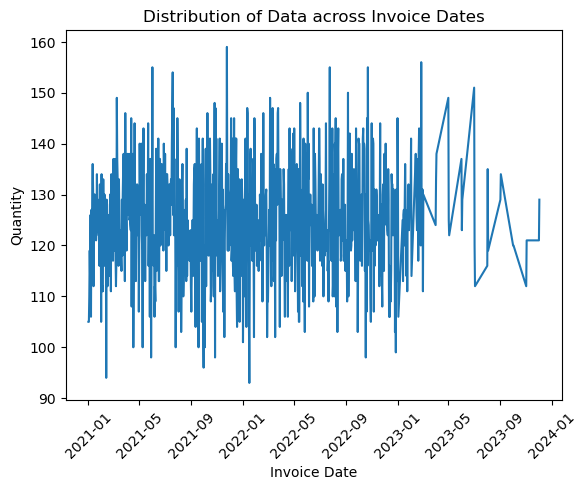

In [7]:
# How is the data distributed across different invoice dates? 
# Are there any seasonal trends or patterns? (Use a graph for this.)

df = pd.read_csv("fct_invoice.csv")
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
date_counts = df["invoice_date"].value_counts().sort_index()
plt.plot(date_counts.index, date_counts.values)
plt.xlabel("Invoice Date")
plt.ylabel("Quantity")
plt.title("Distribution of Data across Invoice Dates")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# explanation: The graph shows that there are days or months or seasons wherein sales are higher or lower 
# than other months. Up until the first few months of 2023, the graph was fluctuating rather frequently. 
# However, that changed towards the latter part of the dataset as can be seen in how much clearer the trends
# in the data in 2023-2024 look.

In [51]:
# HARD QUESTION

with open('dim_customer.json', 'r') as json_file:
    data = json.load(json_file)
    
merged_df=pd.merge(df,json_df)

merged_df['age_range']=((merged_df['age']//10)*10)

df['sales']=df['quantity']*df['price']

pivot_table = pd.pivot_table(merged_df,values='sales', index='category', columns='age_range', aggfunc='sum')

column_labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
pivot_table.columns = column_labels

#ChatGPT was used to create pivot tables

pivot_table

,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
